In [ ]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Callable 
from numpy.typing import ArrayLike
from random import random
sns.set_theme()
sns.set_palette("magma")

---
# Ejercicio 3

Calcular una aproximación del p−valor de la hipótesis: “Los siguientes 10 números son aleatorios”:
$$
0.12, \quad 0.18,\quad 0.06,\quad 0.33,\quad 0.72,\quad 0.83,\quad 0.36,\quad 0.27,\quad 0.77,\quad 0.74.
$$

Tenemos que $H_0$:*"Los 10 números son aleatorios"*

Esto implica que provengan de una distribución F de una variable aleatoria uniforme en el (0,1). Como es una variable aleatoria continua utilizaremos el *Test de Kolmogorov-Smirnov* ya que es adecuado para este tipo de casos:

1. Ordenamos los datos.
2. Corroboramos de que los datos no están repetidos.
3. Para construír el estadístico se comparan las funciones de distribución acumulada de F y la $F_e$ de los datos.

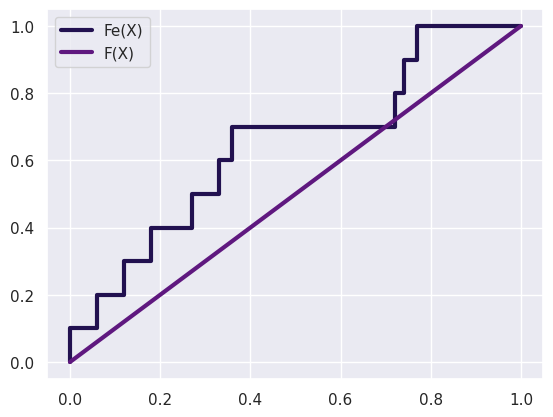

In [ ]:
observed_samples = [
    0.12, 0.18, 0.06,
    0.33, 0.72, 0.83,
    0.36, 0.27, 0.77,
    0.74
]

# Ordenamos los datos
OBSERVED_SAMPLES = np.sort(observed_samples)
NSAMPLES = len(OBSERVED_SAMPLES)

x_values = np.concatenate(([0], OBSERVED_SAMPLES, [1]))
empirical_data = np.concatenate(([0], np.arange(1, NSAMPLES + 1) / NSAMPLES, [1]))

# Distribución real (Uniforme(0,1))
real_data = stats.uniform.cdf(x_values)

plt.step(x_values, empirical_data, label='Fe(X)', linewidth=3)
sns.lineplot(x=x_values, y=real_data, label='F(X)', linewidth=3)

plt.legend()
plt.show()

In [88]:
def KS_statistic(samples: ArrayLike, G: Callable[[ArrayLike], ArrayLike]) -> float:
        """
        Estadistico de Kolmogorov-Smirnov para una muestra

        Args:
            samples (ArrayLike): muestras que se reciben para el estadistico
            G (Callable[[ArrayLike],ArrayLike]): función sobre la que se aplica
            el estadistico.
        
        Returns:
            (float): Resultado del estadistico.
        """
        n = len(samples)
        # Calculo la empírica
        Fe_samples = np.concatenate(([0], np.arange(1, n+1, 1) / n,[1]))
        # Distribución Uniforme Real
        G_values = G(samples)
        
        # Calculamos el estadistico
        Fe_minus = np.arange(0, n) / n
        Fe_plus = np.arange(1, n+1) / n

        # D = d
        D_plus = Fe_plus - G_values
        D_minus = G_values - Fe_minus
        d = np.max(np.concatenate([D_plus, D_minus]))
        return d

def test_Kolmogorov_Smirnov(alpha:float, samples:list[float], Nsamples:int, Nsim: int):
    """
    Test de Kolmogorov_Smirnov con H0: "las muestras del ejercicio
    son uniformes en [0, 1]" y confianza de 95%.

    Args:
        Nsamples (int): numero de muestras por iteracion
        Samples (List[float]): Muestras del ejercicio
        Nsim (int): numero de simulaciones para estimar el p-valor
    """
    # Ordeno las muestras
    x_samples = np.sort(list(samples))
    # Utiliza como función F la func de distrib acumulada de la unif.
    d = KS_statistic(samples=x_samples, G=stats.uniform.cdf)

    print(f"🧐 D estadístico:{round(d, 4)}")

    p_value = 0
    for _ in range(Nsim):
        samples = list(random() for _ in range(Nsamples))
        # Ordeno las muestras
        u_samples = np.sort(list(samples))
        # Función identidad: G(u) = u
        d_sim = KS_statistic(samples=u_samples, G=lambda x: x)
        if d_sim >= d:
            p_value += 1
    
    p_value = p_value / Nsim
    print(f"☝️ p-valor obtenido: {round(p_value, 4)}")

    if p_value > alpha:
        print("😒 No hay evidencia suficiente para rechazar Ho")
    else:
        print(f"🔴 Se rechaza Ho con una confianza del {100 * (100-alpha)}%")

In [93]:
ALPHA = 0.05
test_Kolmogorov_Smirnov(alpha=ALPHA, samples=OBSERVED_SAMPLES, Nsamples=NSAMPLES, Nsim=10_000)

🧐 D estadístico:0.24
☝️ p-valor obtenido: 0.5407
😒 No hay evidencia suficiente para rechazar Ho


In [90]:
# Utilizando la librería de scipy
test_result = stats.kstest(OBSERVED_SAMPLES, cdf="uniform")
d = test_result[0]
p_value = test_result[1]

print(f"🧐 D estadístico:{round(d, 4)}")
print(f"☝️ p-valor obtenido: {round(p_value, 4)}")

if p_value > ALPHA:
    print("😒 No hay evidencia suficiente para rechazar Ho")
else:
    print(f"🔴 Se rechaza Ho con una confianza del {100 * (100-alpha)}%")

🧐 D estadístico:0.24
☝️ p-valor obtenido: 0.5355
😒 No hay evidencia suficiente para rechazar Ho
